In [2]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
def show_graph_results(path):
    """
    Unpickles the solution at the path.

    Args:
        path (string): Path of the pickled results.
    Returns:
        numpy.ndarray: Solutions extracted from the pickled file.
    """
    print(f"The path of the extracted solution is {path}")

    with open(path, 'rb') as file:
        solutions = pickle.load(file)
        return solutions

In [4]:
# Optimal solution from the benchmark (no computation from my side, results were stored in repo)

benchmark_ising_path = os.path.join(
    os.getcwd(), "_graphs/benchmarks/opts/cuts_ising_125spin.pkl")

optimal_solutions = show_graph_results(benchmark_ising_path)
print(optimal_solutions)

The path of the extracted solution is c:\Users\chaum\Desktop\DATAAI\Internship\k-eco-dqn\eco-dqn\_graphs/benchmarks/opts/cuts_ising_125spin.pkl
[110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]


In [28]:
ER200_ising_path = "kcut/eco/2sets/benchmarks/best_ER_200spin/results_ising_125spin_graphs.pkl"
ER200_solutions = show_graph_results(ER200_ising_path)
ER200 = list(ER200_solutions["cut"])
ER200_mean = list(ER200_solutions["mean cut"])
print("Best", ER200)
print("Mean", ER200_mean)

The path of the extracted solution is kcut/eco/2sets/benchmarks/best_ER_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]
Mean [107.2, 109.16, 104.76, 111.36, 109.36, 109.08, 108.4, 107.08, 107.24, 108.72]


In [29]:
BA200_ising_path = "kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl"
BA200_solutions = show_graph_results(BA200_ising_path)
BA200 = list(BA200_solutions["best_cut"])
BA200_mean = list(BA200_solutions["mean_cut"])
print("Best", BA200)
print("Mean", BA200_mean)

# VNS
VNS_ising_path = "kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl"
VNS_solutions = show_graph_results(VNS_ising_path)
VNS = list(VNS_solutions["vns_cut"])
VNS_mean = list(VNS_solutions["vns_mean_cut"])
print("Best", VNS)
print("Mean", VNS_mean)

The path of the extracted solution is kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]
Mean [105.2, 106.72, 102.64, 107.68, 107.84, 105.72, 106.08, 103.76, 104.28, 106.6]
The path of the extracted solution is kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 112.0, 110.0, 110.0, 112.0, 106.0, 108.0, 110.0]
Mean [103.0, 103.64, 99.04, 103.56, 103.04, 101.8, 101.2, 100.6, 100.52, 102.76]


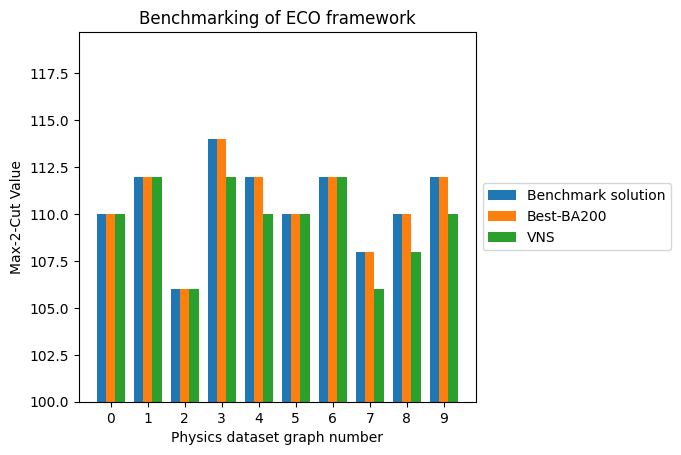

In [35]:
# Set up the plot
fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(10)

# Plot the bars
rects1 = ax.bar(x - width, optimal_solutions, width, label='Benchmark solution')
rects3 = ax.bar(x , BA200, width, label='Best-BA200')
rects4 = ax.bar(x + width, VNS, width, label='VNS')

# Add some labels and a legend
ax.set_xlabel('Physics dataset graph number')
ax.set_ylabel('Max-2-Cut Value')
ax.set_title('Benchmarking of ECO framework')
ax.set_xticks(x)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylim(bottom=100)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


NameError: name 'network_cuts' is not defined

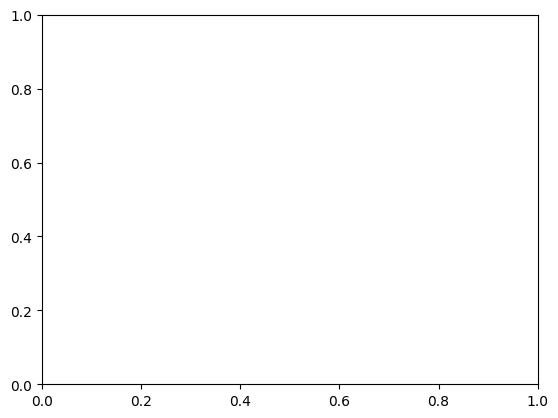

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(21)

# Plot the bars
rects1 = ax.bar(x - width/2, network_cuts, width, label='RL algorithm')
rects2 = ax.bar(x + width/2, vns_cuts, width, label='vns')

# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max Cut Value')
ax.set_title('Benchmarking on the max-3-cut problem')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()



NameError: name 'normalized' is not defined

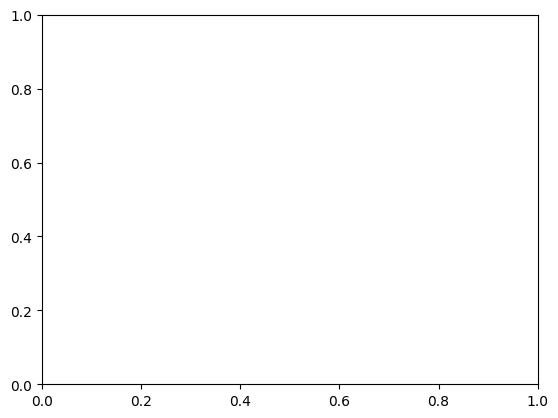

In [11]:
fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(21)

# Plot the bars
rects1 = ax.bar(x , normalized, width, label='RL algorithm')
plt.ylim(bottom=0.5)
for i, v in enumerate(normalized):
    plt.text(i, v+0.01, str(round(v,2)), ha='center', fontsize=6)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Normalized Max Cut Value')
ax.set_title('Normalized results of the RL algorithm compared to VNS')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()

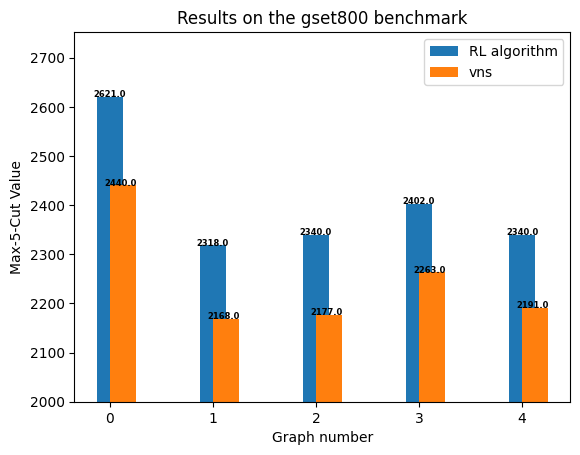

In [36]:
# Trained for 500 000 epochs, basic training

BA_500 = [17470.0,17473.0,17479.0,17486.0,17476.0,2621.0,2318.0,2340.0,2402.0,2340.0]
VNS = [17415.0,17424.0,17403.0,17417.0,17402.0,2440.0,2168.0,2177.0,2263.0,2191.0]

BA500_time = [879.0575861930847,771.4042403697968,839.6154205799103,895.8391950130463,967.216415643692,
              880.0510449409485,928.5763897895813,1087.247559785843,924.0284512042999,940.4236791133881]
VNS_time = [1064.4324769973755,1081.4213254451752,1161.1909461021423,1098.3262977600098,1158.6081161499023,
            984.529128074646,1211.1384825706482,1209.2283506393433,1161.1950941085815,1311.8131296634674]

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x , BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, VNS[5:], width, label='vns')
plt.ylim(bottom=0.5)
for i, v in enumerate(VNS[5:]):
    plt.text(i+0.1, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(i, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()

# Reduced sets

In [4]:
BA100_ising_path = "kcut/eco/5sets/100spins/test/100gspins/reducedsets/results_BA_100spin_m4_100graphs.pkl"
BA100_solutions = show_graph_results(BA100_ising_path)
BA100 = list(BA100_solutions["best_cut"])
BA100_mean = list(BA100_solutions["mean_cut"])
VNS = list(BA100_solutions["vns_cut"])
VNS_mean = list(BA100_solutions["vns_mean_cut"])
total_time = list(BA100_solutions["time"])
total_env_time = list(BA100_solutions["env_time"])
total_vns_time = list(BA100_solutions["vns_time"])
print("Best", BA100)
print("Mean", BA100_mean)
print("Best", VNS)
print("Mean", VNS_mean)
print(f"Total: {total_time}, Env time: {total_env_time}, VNS time: {VNS_time}")

The path of the extracted solution is kcut/eco/5sets/100spins/test/100gspins/reducedsets/results_BA_100spin_m4_100graphs.pkl
Best [101.0, 98.0, 88.0, 100.0, 86.0, 112.0, 92.0, 77.0, 110.0, 132.0]
Mean [93.24, 83.8, 77.82, 89.52, 76.36, 100.78, 83.92, 63.56, 95.7, 119.58]
Best [110.0, 102.0, 95.0, 107.0, 93.0, 113.0, 101.0, 85.0, 111.0, 136.0]
Mean [99.6, 91.54, 84.68, 95.74, 82.76, 105.02, 90.34, 71.24, 101.66, 124.1]


# MOH Results

## max-3-cut

The path of the extracted solution is kcut/eco/3sets/500spins/localDiversity/benchmarks/gset800/results_gset_800spin_graphs.pkl


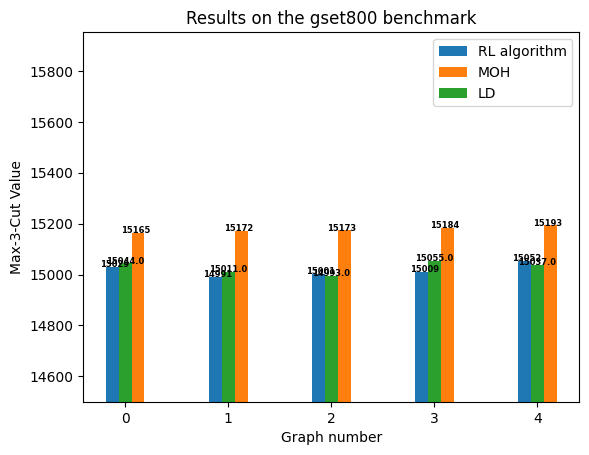

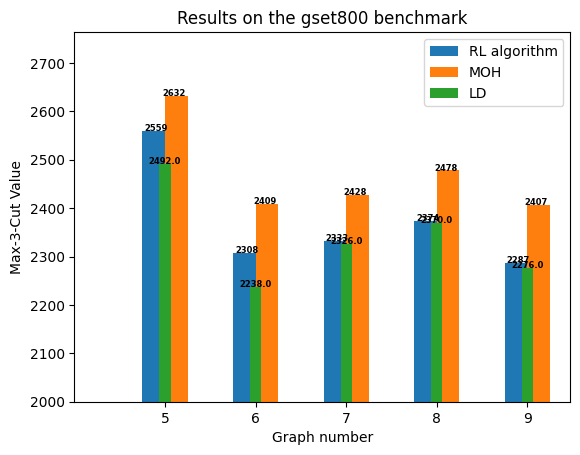

In [12]:
# g1_path = os.path.join(os.getcwd(), "_graphs/benchmarks/gset_800spin_graphs.pkl")
# g1 = show_graph_results(g1_path)
# g1[0][0]

MOH_best = [15165,15172,15173,15184,15193,2632,2409,2428,2478,2407]

BA_500 = [15029,14991,15001,15009,15052,2559,2308,2333,2374,2287]

VNS = [14882,14916,14883,14886,14897,2347,2123,2123,2178,2173]

LD_ising_path = "kcut/eco/3sets/500spins/localDiversity/benchmarks/gset800/results_gset_800spin_graphs.pkl"
LD_solutions = show_graph_results(LD_ising_path)
LD = list(LD_solutions["best_cut"])
# print(LD)

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[:5], width/2, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[:5], width/2, label='MOH')
rects3 = ax.bar(x , LD[:5], width/2, label='LD')

plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[:5]):
    plt.text(i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[:5]):
    plt.text(i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(LD[:5]):
    plt.text(i, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=14500)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-3-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()
plt.plot()


fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5,10)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[5:], width, label='MOH')
rects3 = ax.bar(x , LD[5:], width/2, label='LD')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[5:]):
    plt.text(5+i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(5+i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(LD[5:]):
    plt.text(5+i, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.xlim(left=4)
plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-3-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

plt.show()

## max-5-cut

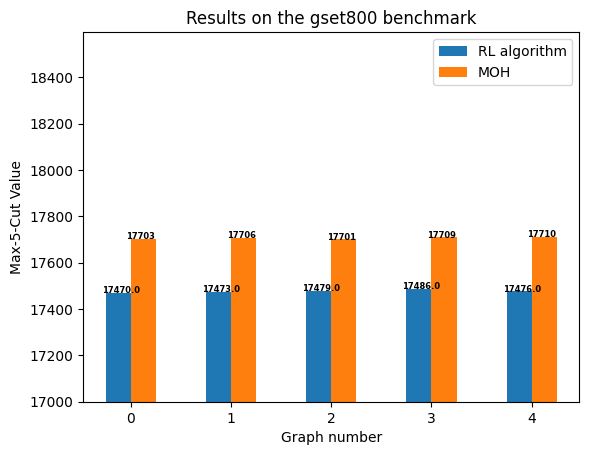

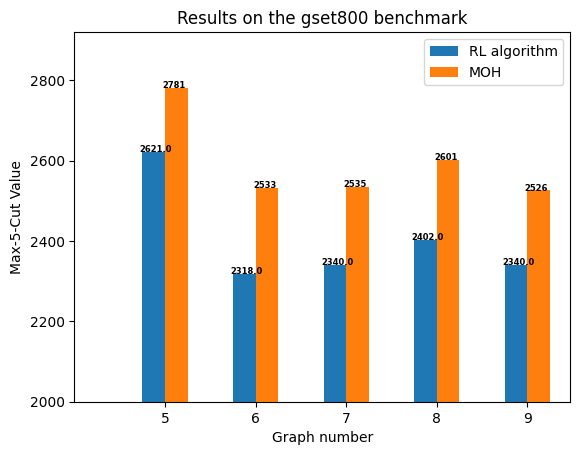

In [71]:
MOH_best = [17703,17706,17701,17709,17710,2781,2533,2535,2601,2526]

BA_500 = [17470.0,17473.0,17479.0,17486.0,17476.0,2621.0,2318.0,2340.0,2402.0,2340.0]

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[:5], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[:5], width, label='MOH')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[:5]):
    plt.text(i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[:5]):
    plt.text(i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=17000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()
plt.plot()


fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5,10)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[5:], width, label='MOH')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[5:]):
    plt.text(5+i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(5+i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.xlim(left=4)
plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

plt.show()